In [6]:
# anscombe 4분할 그래프로
# Visualization의 중요성을 이해해 봅시다
import seaborn as sns
# 샘플 데이터 셋의 목록
# sns.get_dataset_names()
# 앤스콤 데이터셋 로드
anscombe = sns.load_dataset("anscombe")

# 데이터 확인
print(type(anscombe))
anscombe

<class 'pandas.core.frame.DataFrame'>


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [8]:
# anscombe 데이터셋에서 dataset이 몇 개가 있는가?
anscombe['dataset'].nunique() # 하위에 총 4개의 데이터 셋이 있다

4

In [10]:
# 하위 데이터 셋으로 분할
ds1 = anscombe[anscombe['dataset'] == 'I'] # 1번 하위 데이터셋
ds2 = anscombe[anscombe['dataset'] == 'II'] # 2번 하위 데이터셋
ds3 = anscombe[anscombe['dataset'] == 'III'] # 3번 하위 데이터셋
ds4 = anscombe[anscombe['dataset'] == 'IV'] # 4번 하위 데이터셋

In [12]:
# 일반적인 가정 : 복수의 데이터 셋이
# 평균, 분산, 상관관계, 회귀선 등이 일치하면 해당 데이터 셋들은 같은 데이터 일 것이다
# -> 엔스콤 주장 : 기초 통계량이 같더라도 데이터 분포는 다를 수 있다
#               그래서 데이터의 시각화가 중요하다

# dataset 1의 기초 통계량
ds1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [14]:
# dataset 2의 기초 통계량 확인
ds2.describe()
# ds1 ~ds4 기초 통계량을 비교해 봅시다 -> 거의 일치할 것

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


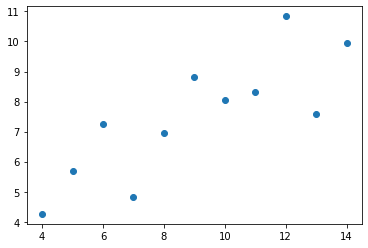

In [15]:
# dataset 1을 그래프로 표현
import matplotlib.pyplot as plt
plt.plot(ds1['x'], ds1['y'], 'o')

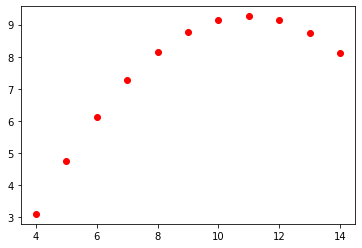

In [17]:
# dataset 2의 그래프 표현
plt.plot(ds2['x'], ds2['y'], "o", color="red")

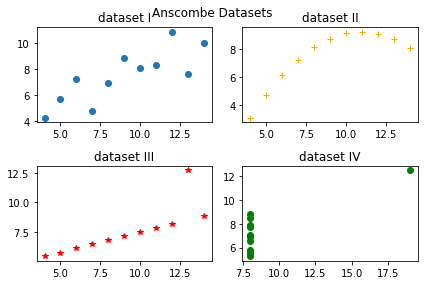

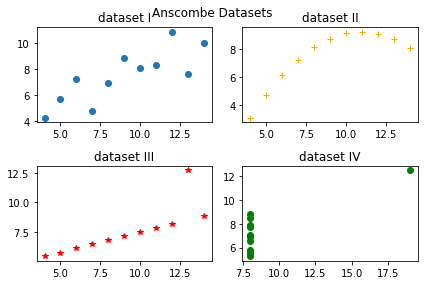

In [29]:
# matplotlivb로 그래프 그리기
# 1, 기본 틀 만들기(figure)
# 2. 내부에 격자를 만들고 서브 플롯을 생성(add_subplot)
# 3. 각 격자에 플롯을 그린다
# 4. 타이틀, 기본틀의 제목 등, 부가적 작업을 수행

# 2* 2 격자를 만들고 각 격자에 I ~ IV데이터 셋의 플롯 그리지
fig = plt.figure() # 기본틀 생성
# 기본 틀에 격자 추가 -> 서브플롯 추가
ax1 = fig.add_subplot(2, 2, 1) # 2 * 2격자의 1번 영역
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# 각 격자에 개별 데이터셋의 플롯을 그리기
ax1.plot(ds1['x'], ds1['y'], "o")
ax2.plot(ds2['x'], ds2['y'], "+", color="orange")
ax3.plot(ds3['x'], ds3['y'], "*", color="red")
ax4.plot(ds4['x'], ds4['y'], "o", color="green")


# 각 서브플롯의 타이틀을 추가
ax1.set_title("dataset I")
ax2.set_title("dataset II")
ax3.set_title("dataset III")
ax4.set_title("dataset IV")

# 전체 그래프의 타이틀 추가
fig.suptitle("Anscombe Datasets")
# 레이아웃 조절
fig.tight_layout()

# 최종 플롯의 출력
fig

In [37]:
# 산점도 그래프
# 두 개의 변수 사이의 관계를 표시하는 그래프
# mtcars 데이터 셋의 wt(중량), mpg(연비) 관계 산점도로 확인
import pandas as pd
mtcars = pd.read_csv("./data/mtcars.csv")

# 데이터의 확인
size = mtcars.shape
print("mtcars {}행 {}열의 데이터셋".format(size[0], size[1]))
mtcars.describe()

mtcars 32행 12열의 데이터셋


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


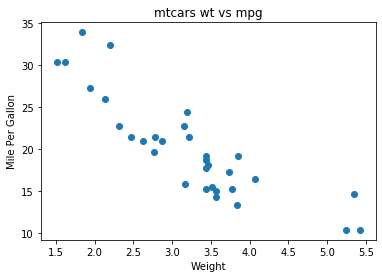

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [43]:
# 산점도 그래프
scatter_fig = plt.figure() # 기본 틀 생성
s_ax = scatter_fig.add_subplot(1, 1, 1) # 1*1격자의 1번 영역
s_ax.scatter(mtcars['wt'], mtcars['mpg']) # x축 중량 전보, y축 연비
s_ax.set_xlabel("Weight")
s_ax.set_ylabel("Mile Per Gallon")
s_ax.set_title("mtcars wt vs mpg")

plt.show()

# x축과 y축의 상관관계 corr()
mtcars.corr() # 상관관계


Text(0.5, 1.0, 'Box Plot if wt, mpg')

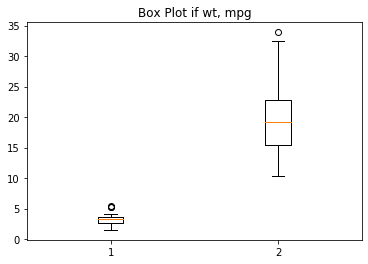

In [47]:
# 상자 그림 Box Plot
# 데이터의 전반적 분포를 파악하는데 유용
# mtcars 데이터셋에서 변수 2개 (wt, mpg)의 데이터 분포를 알아보자
boxplot = plt.figure()
boxplot_axe = boxplot.add_subplot(1, 1, 1) # 1*1의 격자의 1번 영역
boxplot_axe.boxplot([mtcars['wt'], mtcars['mpg']])

boxplot_axe.set_title("Box Plot if wt, mpg")


In [54]:
# 극단치의 확인
#IQR (3사분위수 = 1사분위수)
# 상단 극단치 경계 = 3사분위수 + IQR * 1.5
# 하단 극단치 경계 = 1사분위수 - IQR * 1.5

# quantile -> 분위수 추출을 위한 메서드
first_quartile = mtcars['mpg'].quantile(0.25) # 25% 지점
third_quartile = mtcars['mpg'].quantile(0.75) # 75% 지점

iqr = third_quartile - first_quartile 
print("IQR of mtcars mpg:", iqr)

border_top = third_quartile +iqr *1.5 # 상단극단치 경계
border_bottom = first_quartile -iqr *1.5 # 하단극단치 경계

print("상단 극단치 경계(mpg):", border_top)
print("하단 극단치 경계(mpg):", border_bottom)

# 불린 추출을 위한 인덱스 논리 리스트 확인 : 상단
b = mtcars['mpg'] > border_top

# 불린 인덱스를 이용한 극단치 추출
mpg_outliers = mtcars[b]

mpg_outliers


IQR of mtcars mpg: 7.375
상단 극단치 경계(mpg): 33.8625
하단 극단치 경계(mpg): 4.362500000000001


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.9,1,1,4,1


In [57]:
# histogram :  구간에 데이터 얼마나 자주 출연하는가 ( 빈도수 )
ws_df = pd.read_csv("./data/wstudents.csv")
ws_df.head()

,height,weights
0,151,48
1,154,44
2,160,48
3,160,52
4,163,58


빈도 구간: [140 145 150 155 160 165 170]
도수 분포표: [ 1.  4. 18. 27. 22.  8.]


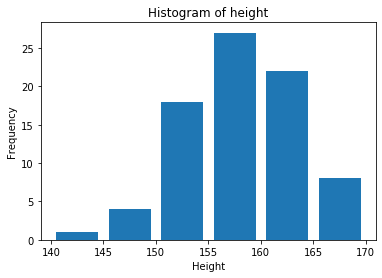

In [68]:
hist_fig= plt.figure()
height_axe = hist_fig.add_subplot(1, 1, 1)

# 빈도 구간을 정의
bins = height_axe.hist(ws_df['height'], rwidth= 0.8, bins=range(140, 175, 5))
# 빈도 구간의 확인
print("빈도 구간:", bins[1])
print("도수 분포표:", bins[0])

height_axe.set_xlabel("Height")
height_axe.set_ylabel("Frequency")
height_axe.set_title("Histogram of height")

plt.show()


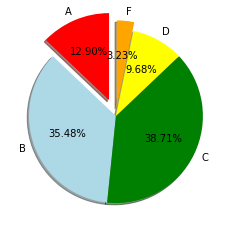

In [76]:
# Pie chart :전체 데이터에 대한 비율을 표시
data = [4, 11, 12, 3, 1]
lables = ["A", "B", "C", "D", "F"]

pie_fig = plt.figure()
pie_axe = pie_fig.add_subplot(1, 1, 1)

pie_axe.pie(data, # 파이 차트에 표시할 데이터(리스트)
           labels=lables, # 각 항목에 표시할 데이터의 라벨
           autopct = "%.2f%%", # 각 항목이 전체에서 차지하는 비율 표시
           startangle=90, # 시작 각도
           explode=(0.2, 0, 0, 0, 0.1), # 튀어나오는 정도
           shadow =True, # 그림자 표시
           colors = ("red", "lightblue", "green", "yellow", "orange"))
plt.show()